## Setting up

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [21]:
DATA_DIR = os.path.abspath("facial_expressions/data/legend.csv")
IMAGE_DIR = os.path.abspath("facial_expressions/images/")

In [22]:
DATA_DIR, IMAGE_DIR

('/home/phongsathron/Project/Test CNN/facial_expressions/data/legend.csv',
 '/home/phongsathron/Project/Test CNN/facial_expressions/images')

## Load dataset

Get images filename

In [23]:
pic_list = os.listdir(IMAGE_DIR)
pic_list

['Zafarullah_Khan_Jamali_0002.jpg',
 'John_Rosa_0002.jpg',
 'Roy_Jones_Jr_0001.jpg',
 'Michelle_Rodriguez_0001.jpg',
 'Joan_Laporta_0005.jpg',
 'George_W_Bush_0201.jpg',
 'George_W_Bush_0217.jpg',
 'Paul_Bremer_0018.jpg',
 'Quincy_Jones_0001.jpg',
 'Naomi_Watts_0019.jpg',
 'Dwarakish_106.jpg',
 'Theresa_Gattung_0001.jpg',
 'Dean_Barkley_0003.jpg',
 'Junichiro_Koizumi_0032.jpg',
 'Mark_Hurlbert_0004.jpg',
 'Anne_Krueger_0002.jpg',
 'Mikhail_Shvydkoi_0001.jpg',
 'Alan_Zemaitis_0001.jpg',
 'John_Sweeney_0001.jpg',
 'George_W_Bush_0410.jpg',
 'Robert_Wagner_0001.jpg',
 'John_Negroponte_0008.jpg',
 'Rick_Wagoner_0001.jpg',
 'Serena_Williams_0008.jpg',
 'Carlos_Moya_0012.jpg',
 'John_F_Kennedy_Jr_0002.jpg',
 'Billy_Sollie_0001.jpg',
 'Colin_Powell_0091.jpg',
 'Elizabeth_Taylor_0002.jpg',
 'George_W_Bush_0382.jpg',
 'Enrik_Vendt_0001.jpg',
 'Gian_Marco_0002.jpg',
 'John_Paul_II_0005.jpg',
 'Terry_Lynn_Barton_0001.jpg',
 'Justin_Timberlake_0006.jpg',
 'Jose_Maria_Aznar_0007.jpg',
 'Noelle_Bush

In [5]:
pic_labels = pd.read_csv(DATA_DIR)
pic_labels[["image", "emotion"]]

,image,emotion
0,facial-expressions_2868588k.jpg,anger
1,facial-expressions_2868585k.jpg,surprise
2,facial-expressions_2868584k.jpg,disgust
3,facial-expressions_2868582k.jpg,fear
4,Aaron_Eckhart_0001.jpg,neutral
5,Aaron_Guiel_0001.jpg,happiness
6,Aaron_Patterson_0001.jpg,neutral
7,Aaron_Peirsol_0001.jpg,happiness
8,Aaron_Peirsol_0002.jpg,happiness
9,Aaron_Peirsol_0003.jpg,happiness


In [24]:
pic_labels["emotion"].unique()

array(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt', 'NEUTRAL', 'SADNESS', 'DISGUST', 'FEAR',
       'SURPRISE', 'ANGER', 'HAPPINESS'], dtype=object)

You can see it have some image label with uppercase character. We need to convert it to lowercase.

## Make dataset ready for train

### Convert uppercase emotion to lowercase

In [25]:
pic_labels["emotion"] = pic_labels["emotion"].str.lower()

In [26]:
pic_labels

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral
5,302,Aaron_Guiel_0001.jpg,happiness
6,302,Aaron_Patterson_0001.jpg,neutral
7,302,Aaron_Peirsol_0001.jpg,happiness
8,302,Aaron_Peirsol_0002.jpg,happiness
9,302,Aaron_Peirsol_0003.jpg,happiness


In [27]:
pic_labels[["image", "emotion"]].values

array([['facial-expressions_2868588k.jpg', 'anger'],
       ['facial-expressions_2868585k.jpg', 'surprise'],
       ['facial-expressions_2868584k.jpg', 'disgust'],
       ...,
       ['SharmilaTagore_82.jpg', 'happiness'],
       ['SharmilaTagore_83.jpg', 'happiness'],
       ['SharmilaTagore_9.jpg', 'happiness']], dtype=object)

In [28]:
pic_labels["int_label"], itest = pic_labels["emotion"].factorize()
pic_labels

,user.id,image,emotion,int_label
0,628,facial-expressions_2868588k.jpg,anger,0
1,628,facial-expressions_2868585k.jpg,surprise,1
2,628,facial-expressions_2868584k.jpg,disgust,2
3,628,facial-expressions_2868582k.jpg,fear,3
4,dwdii,Aaron_Eckhart_0001.jpg,neutral,4
5,302,Aaron_Guiel_0001.jpg,happiness,5
6,302,Aaron_Patterson_0001.jpg,neutral,4
7,302,Aaron_Peirsol_0001.jpg,happiness,5
8,302,Aaron_Peirsol_0002.jpg,happiness,5
9,302,Aaron_Peirsol_0003.jpg,happiness,5


In [29]:
itest

Index(['anger', 'surprise', 'disgust', 'fear', 'neutral', 'happiness',
       'sadness', 'contempt'],
      dtype='object')

### Create Image Data Generator

In [30]:
from keras.preprocessing import image
import keras

In [31]:
emotion_label = list(pic_labels["emotion"].unique())

#### Split data for train and validate

In [14]:
train_set = pic_labels[4000:].reset_index()
validation_set = pic_labels[:4000].reset_index()
# test_set = pic_labels[10000:13000].reset_index()

In [16]:
def load_data(dataset):
    imgs = np.empty((len(dataset),224,224,3),dtype="float32")
    j = 0
    for img_file in dataset["image"]:
        img_path = IMAGE_DIR +"/"+ img_file
        img = image.load_img(img_path, target_size=(224, 224))
        arr = np.asarray(img, dtype="float32")
        imgs[j,:,:,:] = arr
        j += 1
#     labels = np.arange(dataset["emotion"].values.size)
    labels = dataset["int_label"].values
    return imgs, labels

In [17]:
train_imgs, train_labels = load_data(train_set)

In [18]:
validate_imgs, validate_labels = load_data(validation_set)

In [19]:
train_labels = keras.utils.to_categorical(train_labels, 8)
validate_labels = keras.utils.to_categorical(validate_labels, 8)

In [20]:
# validate_labels

In [21]:
train_labels.shape

(9690, 8)

In [22]:
validate_labels.shape

(4000, 8)

In [23]:
# validate_imgs = keras.utils.to_categorical(validate_imgs, 8)
# validate_imgs.shape

## Normalize data

In [24]:
train_imgs /= 255
validate_imgs /= 255

We need to move image file to sub folders

In [25]:
# import shutil

#### Create subfolder and copy images

In [26]:
# for new_path in emotion_label:
#     if not os.path.exists(IMAGE_DIR+'/../train/'+new_path):
#             os.makedirs(IMAGE_DIR+'/../train/'+new_path)

# for i in range(len(train_set["image"])):
#     shutil.copy(IMAGE_DIR+"/"+train_set["image"][i], IMAGE_DIR+'/../train/'+train_set["emotion"][i]+'/'+train_set["image"][i])

In [27]:
# for new_path in emotion_label:
#     if not os.path.exists(IMAGE_DIR+'/../validate/'+new_path):
#             os.makedirs(IMAGE_DIR+'/../validate/'+new_path)

# for i in range(len(validation_set["image"])):
#     shutil.copy(IMAGE_DIR+"/"+validation_set["image"][i], IMAGE_DIR+'/../validate/'+validation_set["emotion"][i]+'/'+validation_set["image"][i])

Gen data

In [28]:
# train_datagen = image.ImageDataGenerator(
# #     zoom_range = 0.2,
# #     shear_range = 0.2,
# #     horizontal_flip = True
# )

# validation_datagen = image.ImageDataGenerator()

# train_generator = train_datagen.flow_from_directory(
#     IMAGE_DIR+'/../train',
#     target_size=(224,224),
#     batch_size=batch_size,
#     class_mode='categorical',
#     classes = list(pic_labels["emotion"].unique())
# )

# validation_generator = validation_datagen.flow_from_directory(
#     IMAGE_DIR+'/../validate',
#     target_size=(224,224),
#     batch_size=batch_size,
#     class_mode='categorical',
#     classes = list(pic_labels["emotion"].unique())
# )

Use bottlenect feature

## Create Model
In this notebook. I want to try with VGG model

### Import Keras

In [32]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import keras.applications

In [33]:
class_num = pic_labels["emotion"].unique().size
class_num

8

In [31]:
# model = Sequential()

# #block 1
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #block 2
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #block 3
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #block 4
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #block 5
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# #Fully Connected
# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(class_num, activation='softmax'))

In [32]:
# model = Sequential()
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# # model.add(Dropout(0.5))
# model.add(Dense(class_num, activation='softmax'))

In [33]:
# model = Sequential()
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(4096, activation='relu'))
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(class_num, activation='softmax'))

In [34]:
model = Sequential()
model.add(keras.applications.resnet50.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3), name='input')))
model.add(Flatten())
model.add(Dense(class_num, activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 16392     
Total params: 23,604,104
Trainable params: 23,550,984
Non-trainable params: 53,120
_________________________________________________________________


In [36]:
from keras import optimizers
optimizer = optimizers.Adam()

In [37]:
model.load_weights('emotion.h5')

In [38]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

## Start Training

Because my GPU problem. I decide to use CPU only.

In [39]:
# model.fit_generator(
#         train_generator,
#         steps_per_epoch=len(train_set)/batch_size,
#         epochs=30,
#         validation_data=validation_generator,
#         validation_steps=len(validation_generator)/batch_size
# )
# model.save_weights('first_try.h5')

In [40]:
validate_imgs.shape

(4000, 224, 224, 3)

In [41]:
batch_size = 20
n_epochs = 20
model.fit(train_imgs, train_labels, batch_size=batch_size, epochs=n_epochs, validation_data=(validate_imgs, validate_labels))

Train on 9690 samples, validate on 4000 samples
Epoch 1/20
9690/9690 [==============================] - 561s 58ms/step - loss: 0.6836 - acc: 0.7784 - val_loss: 0.7377 - val_acc: 0.7515
Epoch 2/20
9690/9690 [==============================] - 549s 57ms/step - loss: 0.5078 - acc: 0.8257 - val_loss: 0.7360 - val_acc: 0.6838
Epoch 3/20
9690/9690 [==============================] - 548s 57ms/step - loss: 0.4459 - acc: 0.8504 - val_loss: 1.4758 - val_acc: 0.5820
Epoch 4/20
9690/9690 [==============================] - 548s 57ms/step - loss: 0.3930 - acc: 0.8646 - val_loss: 1.0394 - val_acc: 0.6420
Epoch 5/20
9690/9690 [==============================] - 548s 57ms/step - loss: 0.3555 - acc: 0.8800 - val_loss: 0.5474 - val_acc: 0.8302
Epoch 6/20
9690/9690 [==============================] - 549s 57ms/step - loss: 0.3043 - acc: 0.8943 - val_loss: 0.7900 - val_acc: 0.7305
Epoch 7/20
9690/9690 [==============================] - 549s 57ms/step - loss: 0.2628 - acc: 0.9058 - val_loss: 1.3237 - val_acc: 

In [42]:
model.save_weights('emotion.h5')

In [39]:
score = model.evaluate(validate_imgs, validate_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

NameError: name 'validate_imgs' is not defined

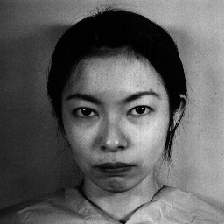

In [54]:
test_img = image.load_img(os.path.abspath("NA.AN2.212.jpg"), target_size=(224, 224))
test_img

In [55]:
imgs = np.empty((1,224,224,3),dtype="float32")
arr = np.asarray(test_img, dtype="float32")
arr[:] = np.max(test_img,axis=-1,keepdims=1)/2+np.min(test_img,axis=-1,keepdims=1)/2
arr = arr.reshape((224, 224, 3))
imgs[0,:,:,:] = arr
imgs /= 255

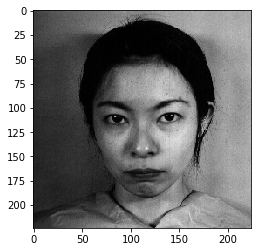

In [56]:
plt.imshow(imgs[0])

In [57]:
predict = model.predict(imgs)

In [62]:
emotion_label[predict.argmax(-1)[0]]

'sadness'